## Import modules

In [1]:
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from scripts.data_loader import load_data
from scripts.data_loader import load_excel_data
from scripts.db_utils import fetch_data_from_db
from scripts.data_visualization import plot_column_frequency
from scripts.data_visualization import plot_histograms
from scripts.analysis import top_10_handsets
from scripts.analysis import top_3_handset_manufacturers
from scripts.analysis import top_5_handsets_per_top_3_manufacturers
from scripts.analysis import aggregate_user_behavior
from scripts.sql_query import get_user_data_query

## Data Loading

In [4]:
# Define your query
query = "SELECT * FROM xdr_data;"  # Replace with the table or query you want

# Fetch data
data_tel = fetch_data_from_db(query)

# Display the data
if data_tel is not None:
    print(data_tel.head())
else:
    print("Failed to fetch data.")

c:\Users\fikad\Desktop\10acedamy\Week_2\scripts\db_utils.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, connection)


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [5]:
data_tel

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [4]:
# Load the dataset
data_tel = load_data(r'C:\Users\fikad\Desktop\10acedamy\Week_2\Data\Copy of Week2_challenge_data_source(CSV).csv')
data_tel.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


In [6]:
data_tel.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [18]:
# Load the dataset
data_tel_xls = load_excel_data(r'C:\Users\fikad\Desktop\10acedamy\Week_2\Data\Week2_challenge_data_source.xlsx')
data_tel_xls.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


In [34]:
data_tel.shape

(150001, 55)

In [20]:
# Load the dataset
data_describe = load_excel_data(r'C:\Users\fikad\Desktop\10acedamy\Week_2\Data\Field Descriptions.xlsx')
data_describe.head(2)

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)


### checking data types

In [21]:
print(data_tel.dtypes)


Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

Identifying and working on categorical dataset

In [29]:
# Get unique values
print(data_tel['Handset Manufacturer'].unique())

# Get frequency of each value
print(data_tel['Handset Manufacturer'].value_counts())


['Samsung' 'undefined' 'Huawei' 'Apple' 'Zte'
 'TP-Link Technologies Co Ltd' 'Ertebat Hamrah Guya Arvand'
 'Wiko Global Sasu' 'TCL Communication Ltd'
 'Oneplus Technology (Shenzhen) Co Ltd' nan 'Zebra Technologies Corp.'
 'Nokia' 'Wiko' 'Tcl Communication Ltd' 'ZTE' 'Lenovo' 'Asustek'
 'Xiaomi Communications Co Ltd' 'Rim' 'Hmd Global Oy'
 'Sony Mobile Communications AB' 'D-Link Corporation' 'Wct'
 'Dn Electronics' 'Sony Mobile Communications Ab' 'Netgear Inc'
 'Neel Enterprise' 'Teletalk Pvt Ltd' 'DDM Brands LLC'
 'Tp-Link Technologies Co Ltd' 'Sierra Wireless' 'Google Inc'
 'Shenzhen Chainway Information Technology Co Ltd' 'Microsoft Mobile Oy'
 'Htc' 'Crosscall' 'Shenzhen Kdi Communication Co Ltd'
 'Simcom Wireless Solutions Co Ltd'
 'Qingdao Hisense Communications Co Ltd' 'Lg' 'Archos Sa'
 'Hewlett-Packard' 'Spa Condor Electronics' 'Sonaki Corporation S.A.'
 'New-Bund Technology Co Limited' 'Meizu Technology Co Ltd' 'LG' 'Doro Ab'
 'Shenzhen Jeko Communication Co Limited'
 'Vivo Mob

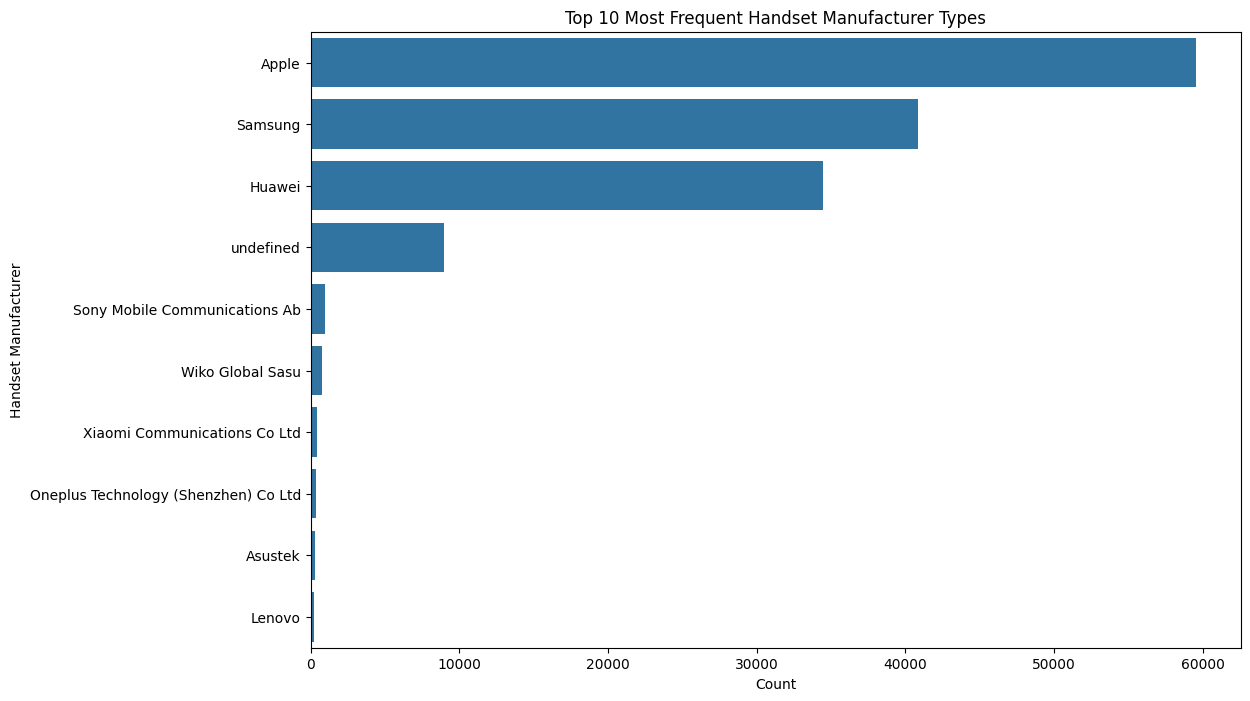

In [30]:
plot_column_frequency(data_tel, column='Handset Manufacturer', top_n=10)


In [32]:
# Get unique values
print(data_tel['Handset Type'].unique())

# Get frequency of each value
print(data_tel['Handset Type'].value_counts())


['Samsung Galaxy A5 Sm-A520F' 'Samsung Galaxy J5 (Sm-J530)'
 'Samsung Galaxy A8 (2018)' ... 'Asustek Asus Zb500Kg'
 'Huawei Mediapad T5 10 Pro' 'Shenzhen Jeko Co. Blackview Bv5800 Pro']
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
                                ...  
Oppo R11S                           1
D-Link Corporati. Dwr-953           1
Asustek Asus Zb500Kg                1
Huawei Mediapad T5 10 Pro           1
Tcl Communicatio. Alcatel 3V        1
Name: count, Length: 1396, dtype: int64


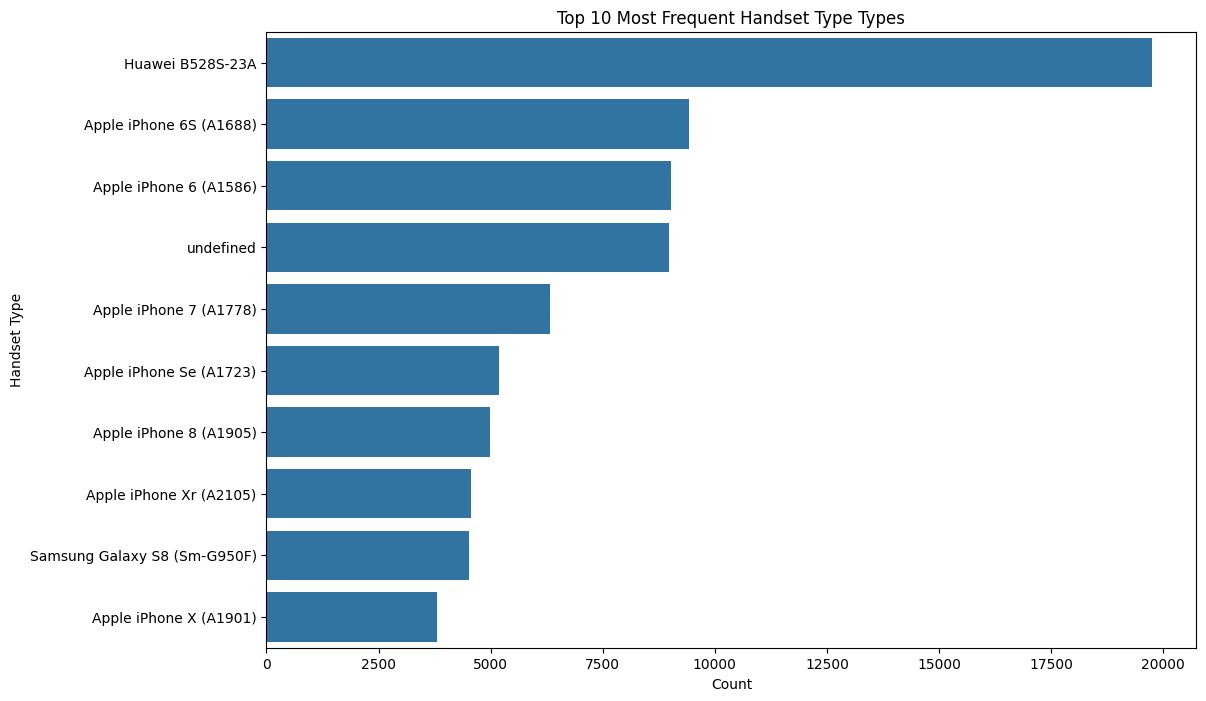

In [33]:
plot_column_frequency(data_tel, column='Handset Type', top_n=10)

In [35]:
# Separate numeric and object columns
numeric_cols = data_tel.select_dtypes(include=['number'])
object_cols = data_tel.select_dtypes(include=['object'])

In [36]:
# Describe numeric columns
print("Descriptive Statistics for Numeric Columns:")
print(numeric_cols.describe())

Descriptive Statistics for Numeric Columns:
          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893173e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.

In [37]:
# Describe object columns
print("\nDescriptive Statistics for Object Columns:")
print(object_cols.describe())


Descriptive Statistics for Object Columns:
                 Start             End Last Location Name  \
count           150000          150000             148848   
unique            9997            6403              45547   
top     4/26/2019 7:25  4/25/2019 0:01            D41377B   
freq               203            1150                 80   

       Handset Manufacturer      Handset Type  
count                149429            149429  
unique                  170              1396  
top                   Apple  Huawei B528S-23A  
freq                  59565             19752  


### Checking missing value

In [12]:
print(data_tel.isnull().sum())


Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [7]:
# Count duplicate rows
duplicate_rows = data_tel.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


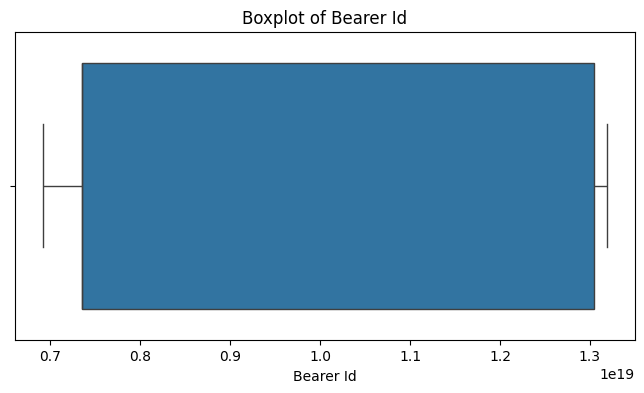

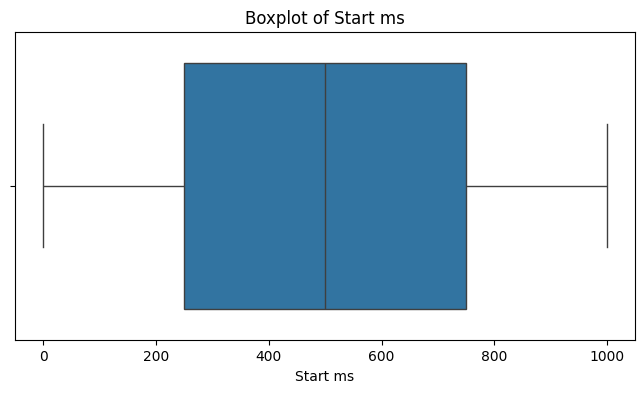

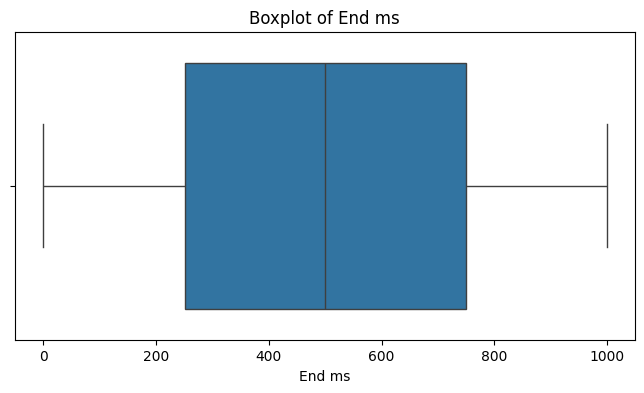

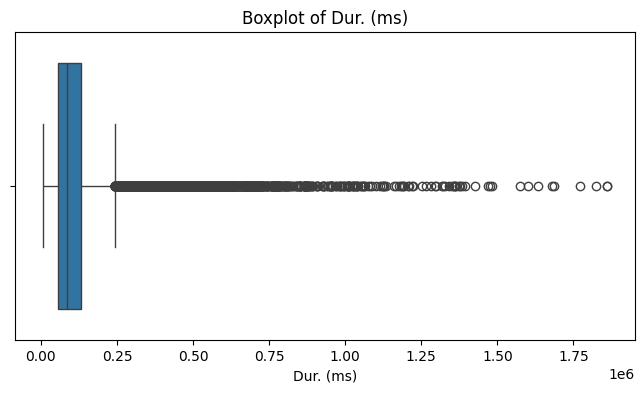

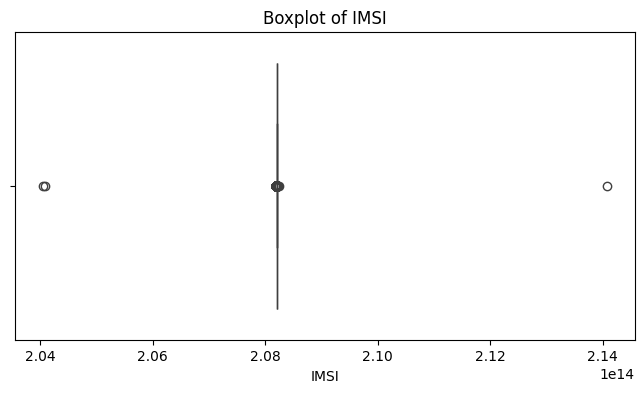

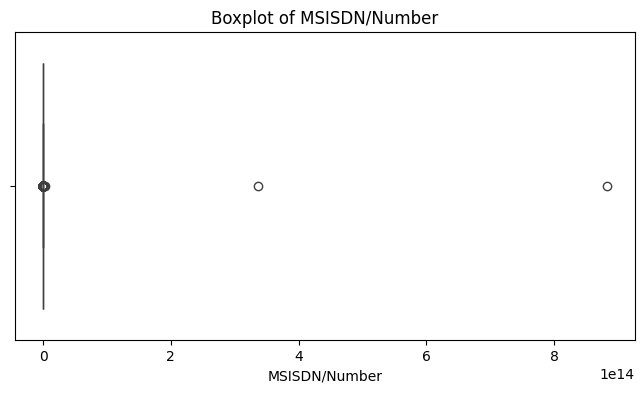

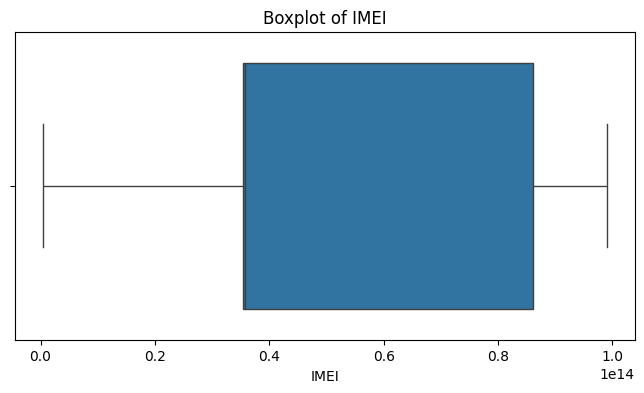

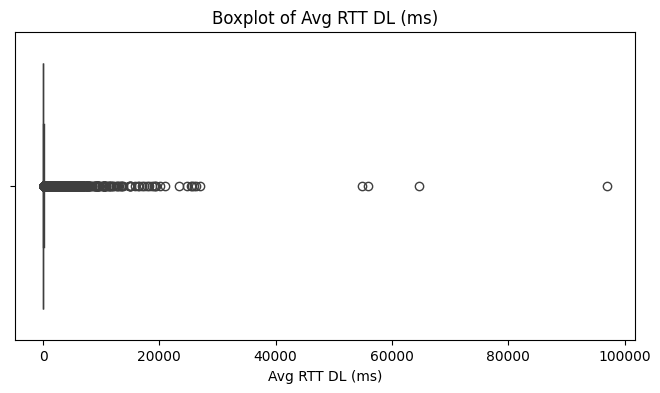

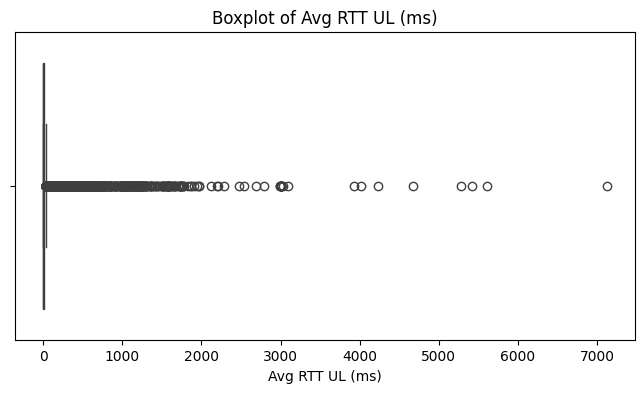

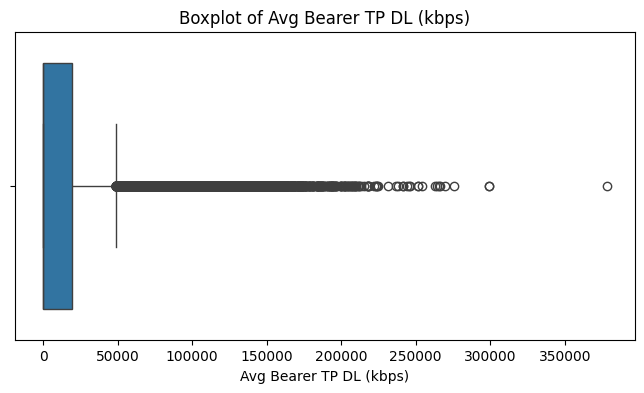

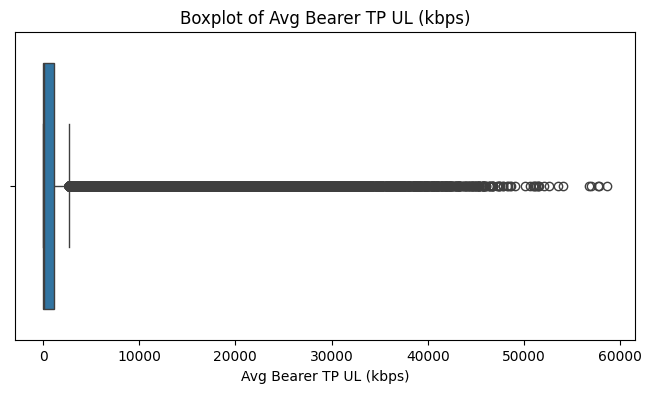

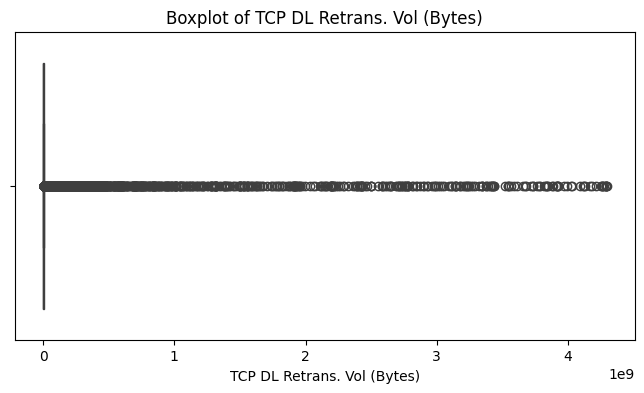

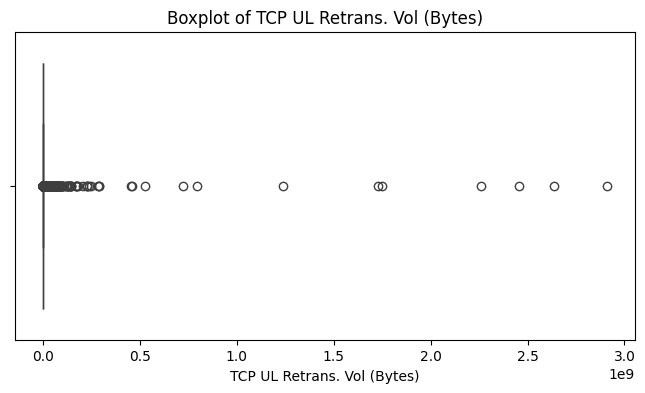

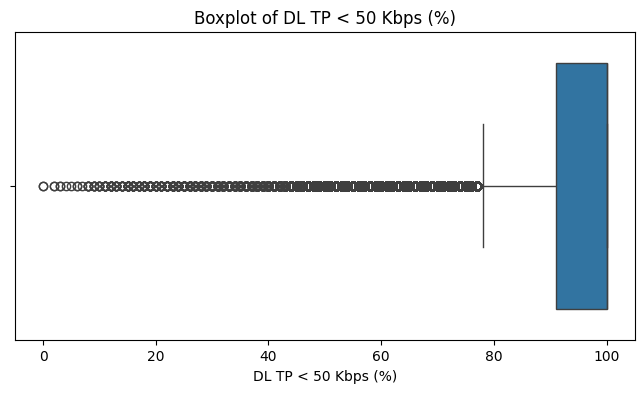

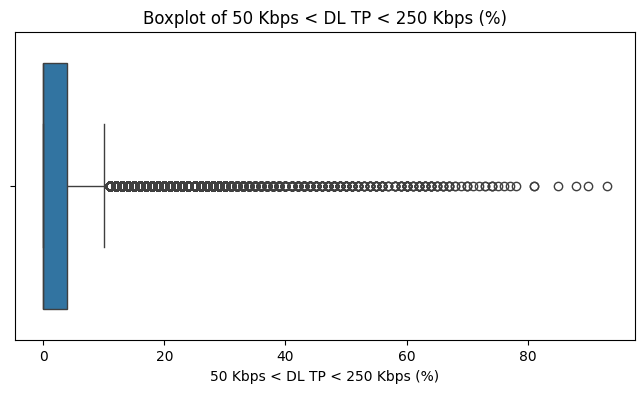

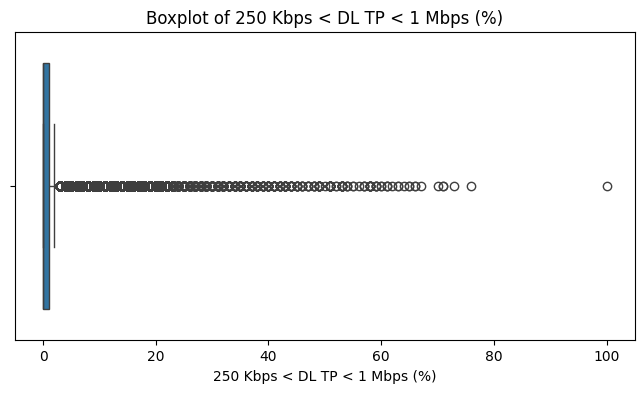

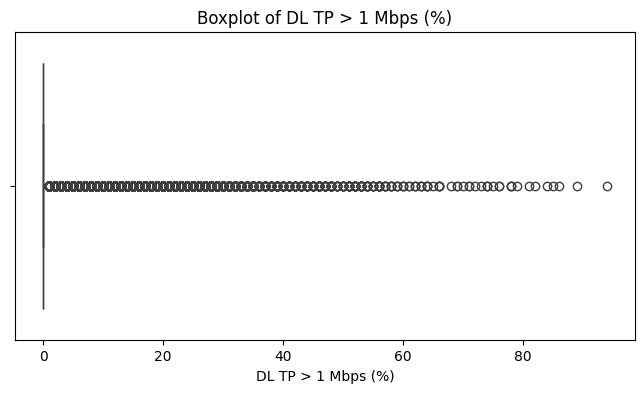

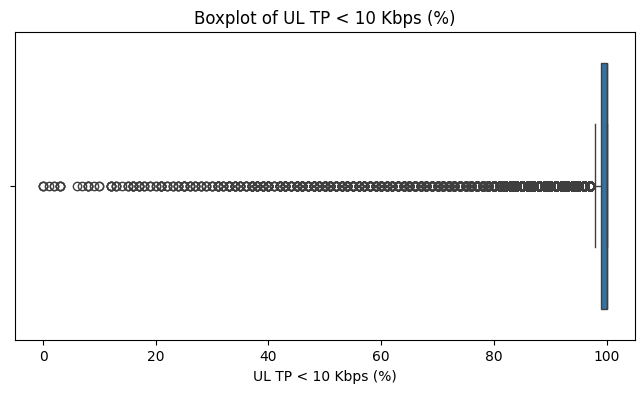

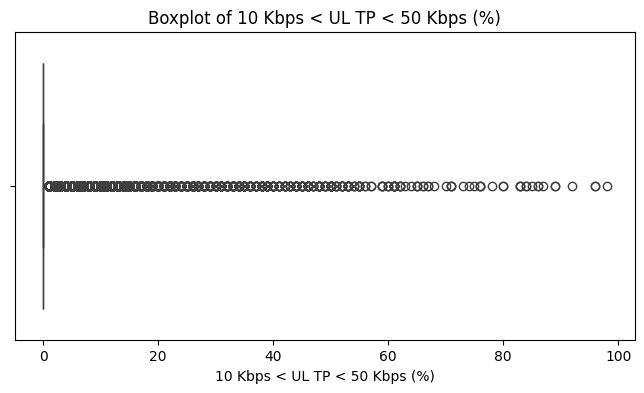

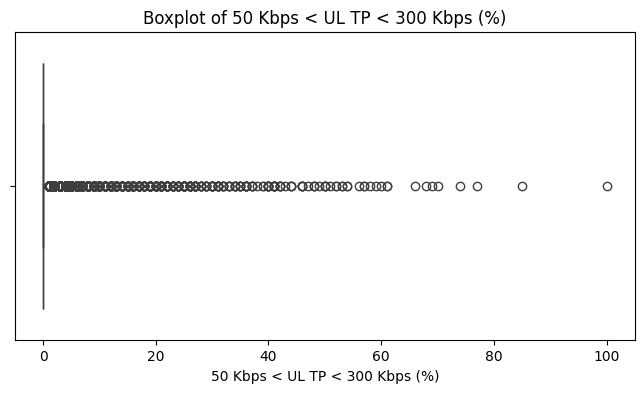

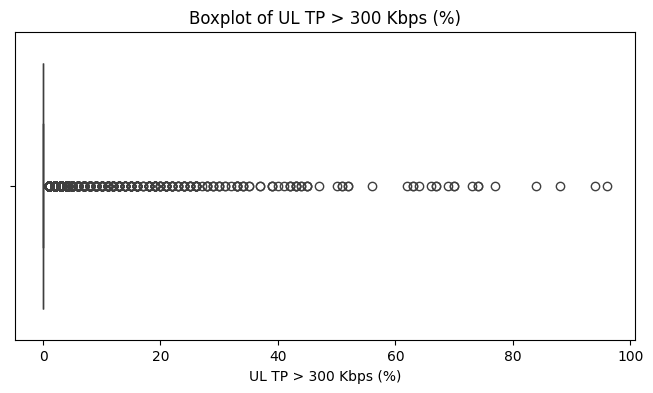

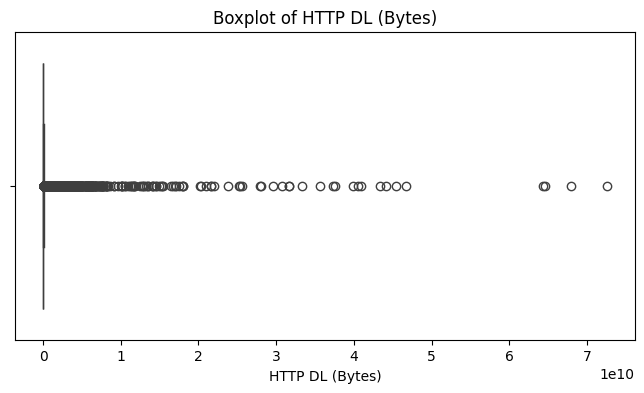

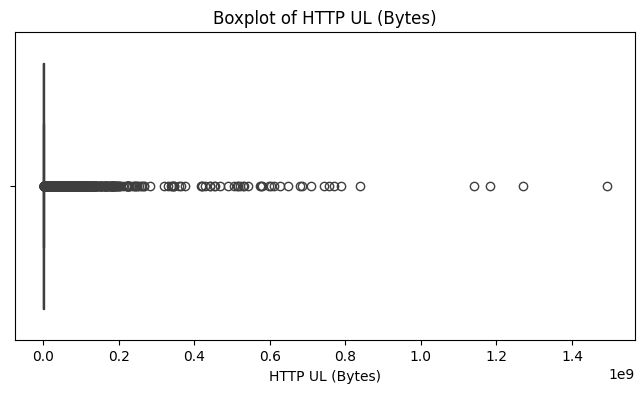

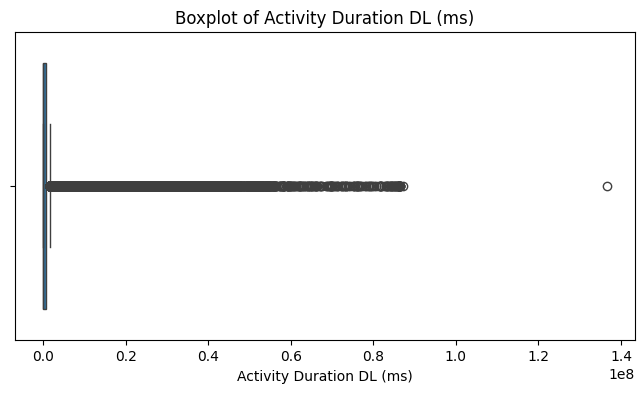

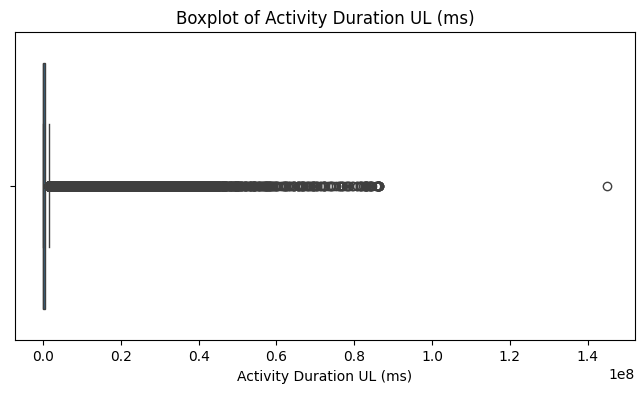

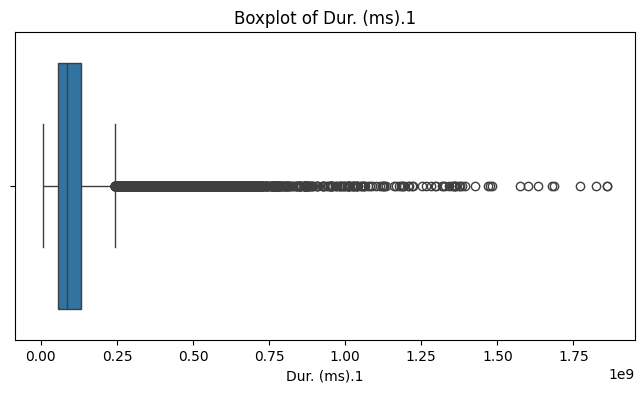

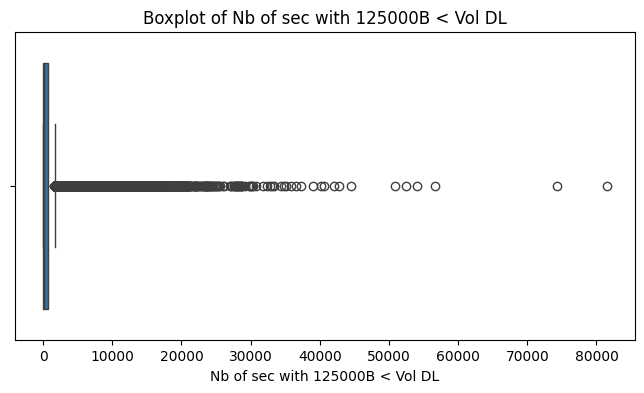

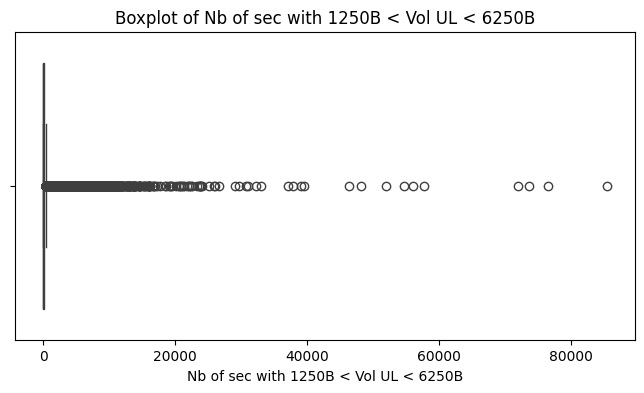

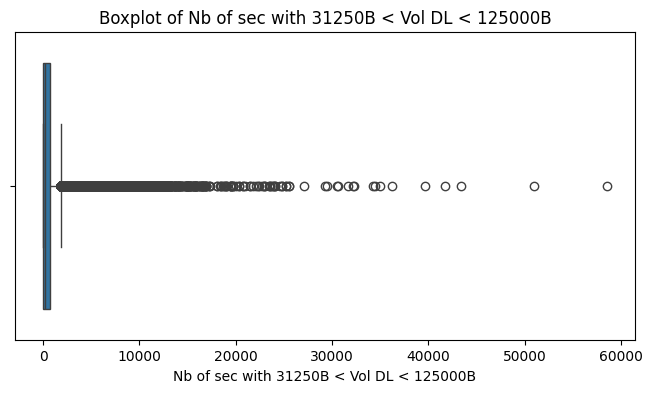

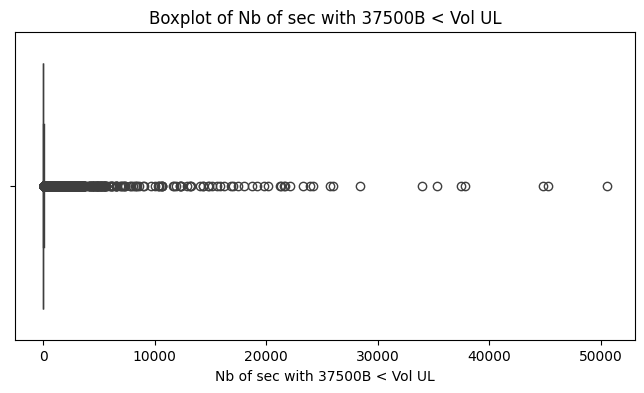

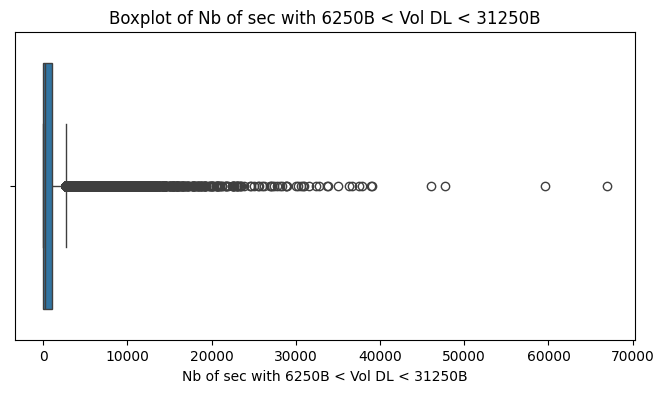

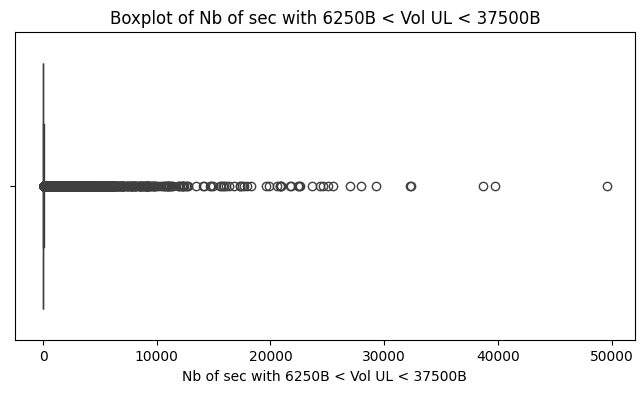

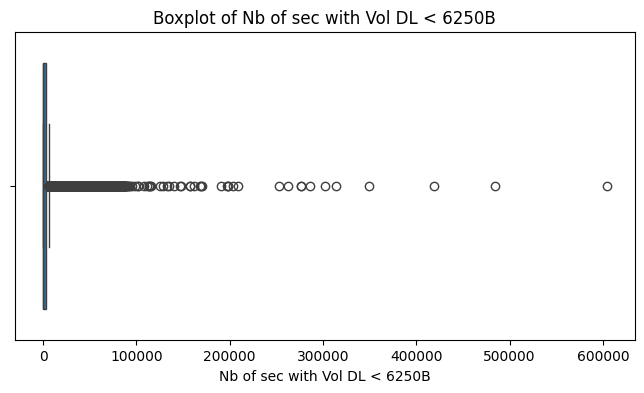

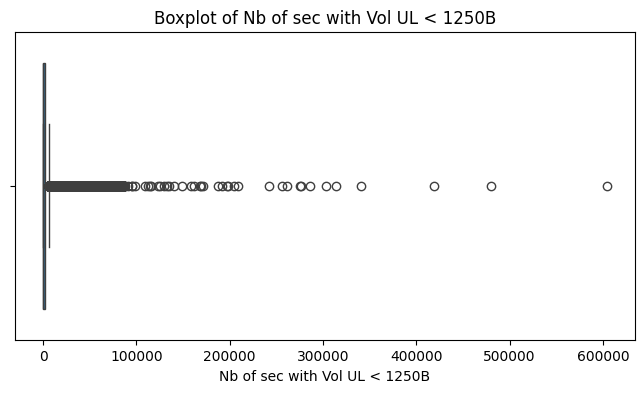

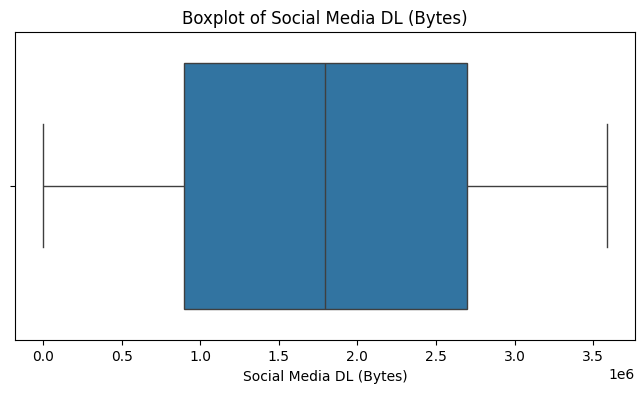

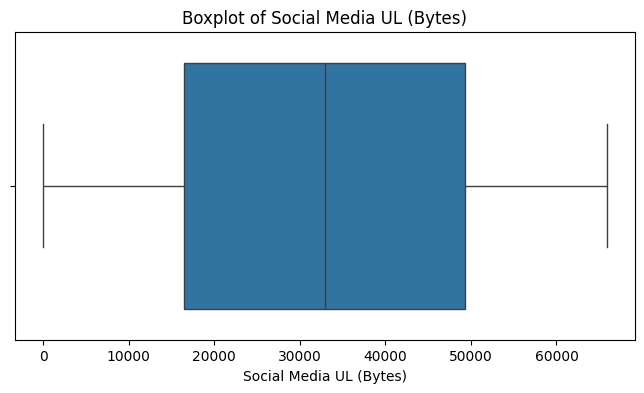

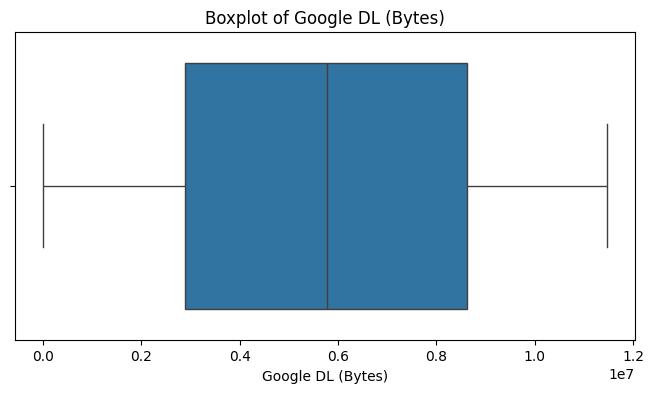

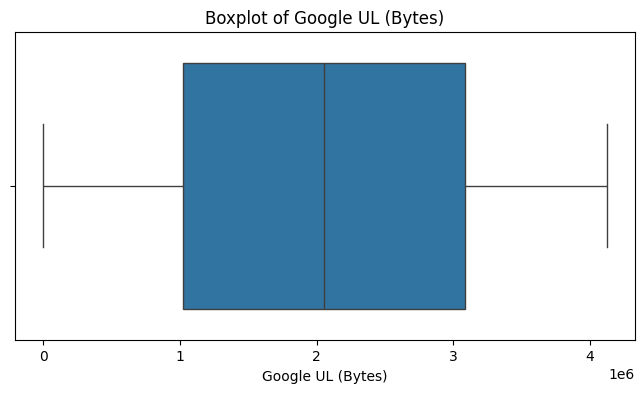

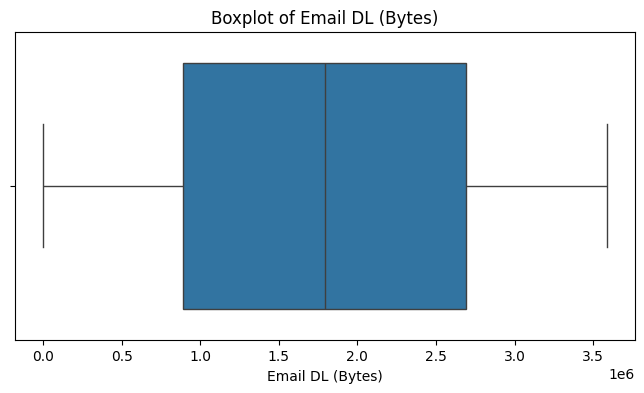

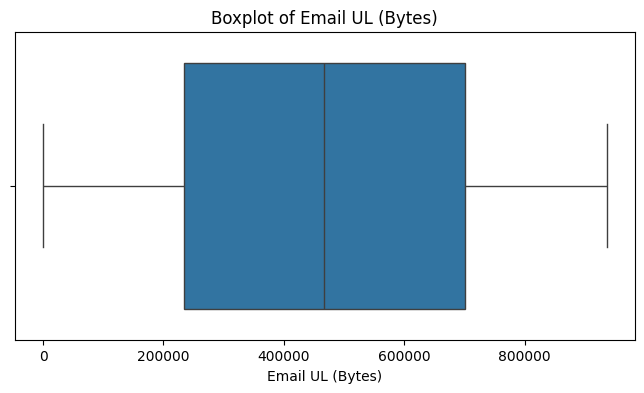

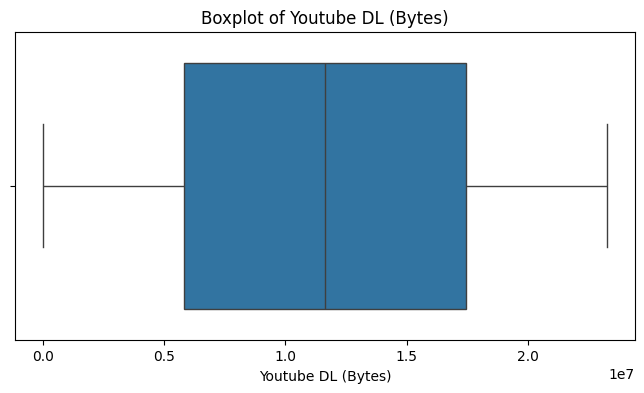

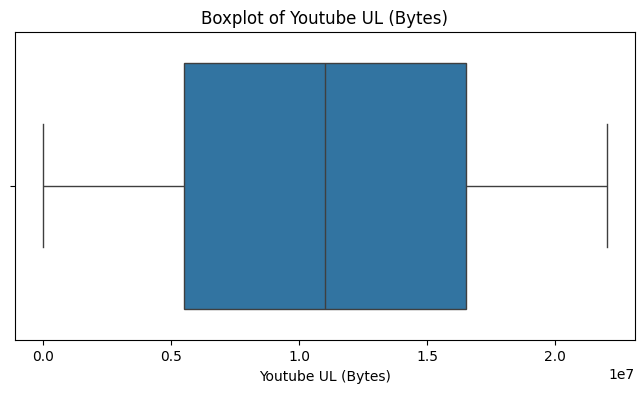

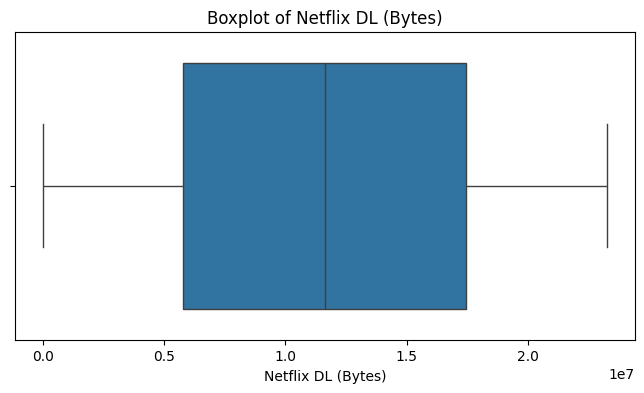

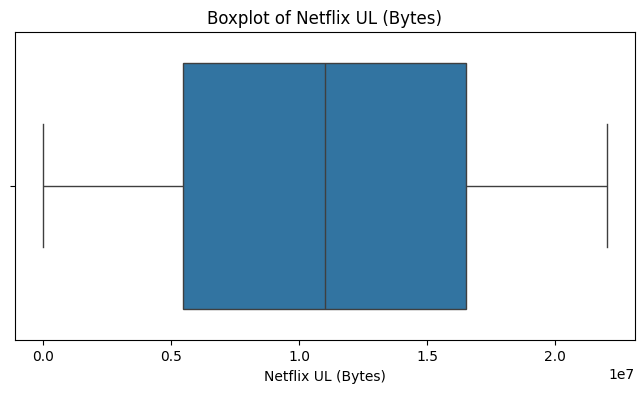

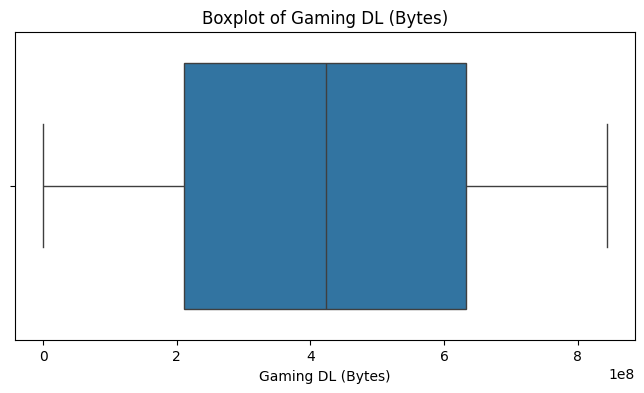

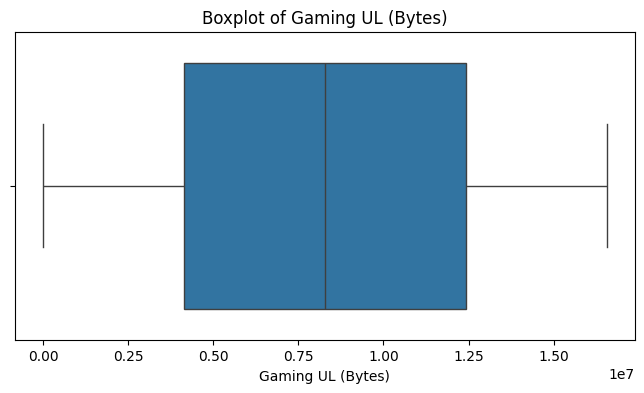

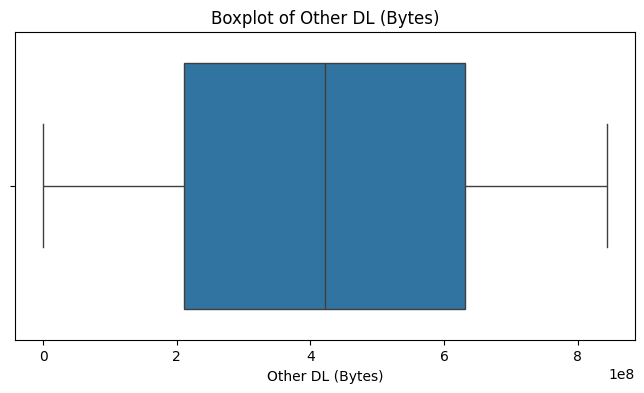

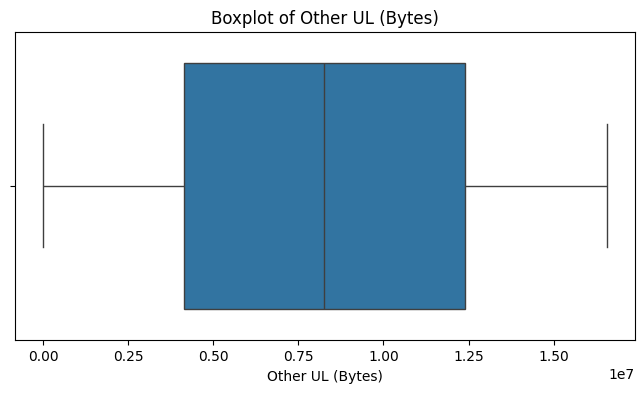

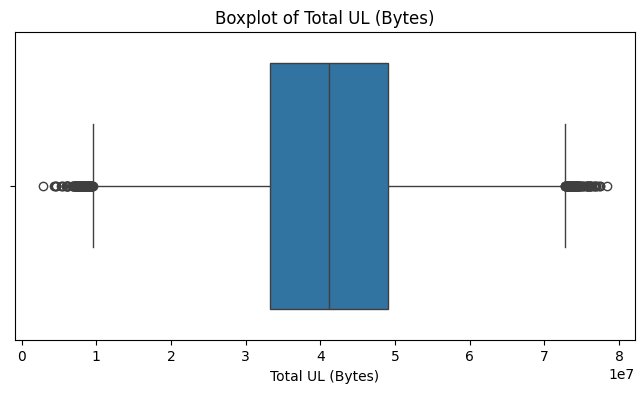

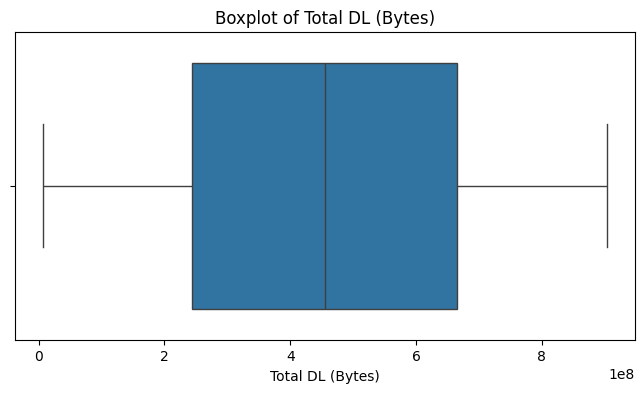

In [10]:
# Boxplot for numerical features
numerical_cols = data_tel.select_dtypes(include=["float64", "int64"]).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data_tel, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


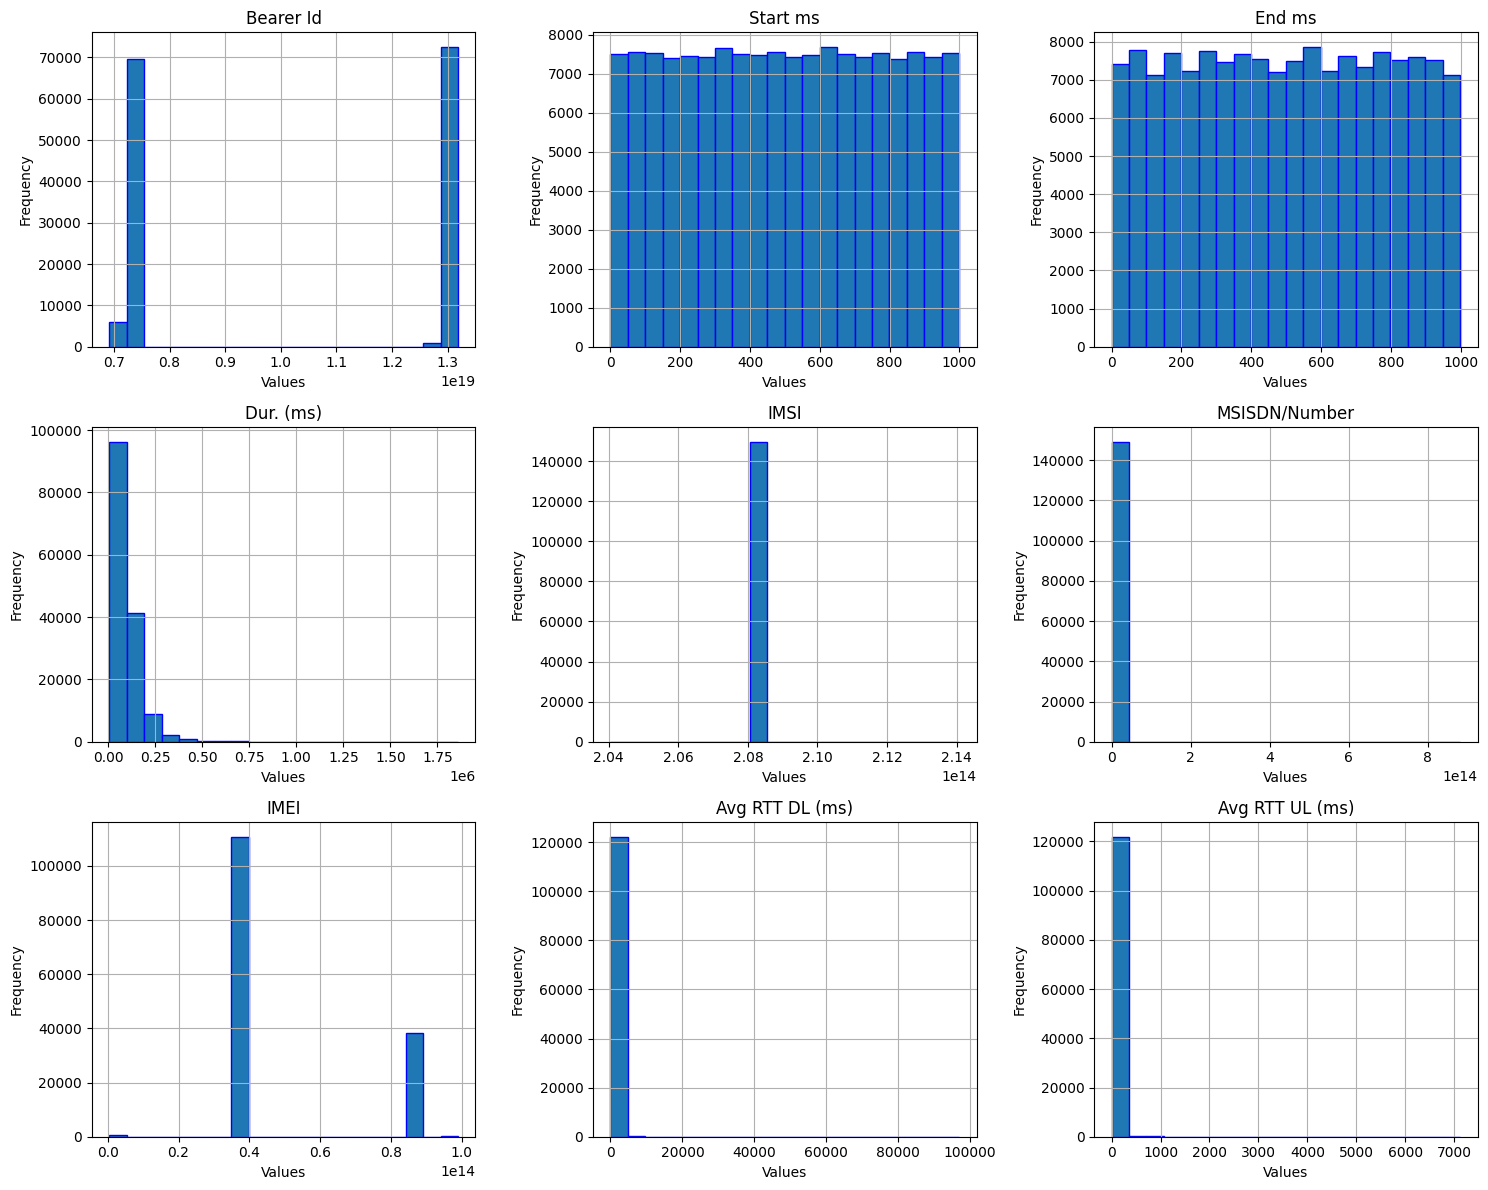

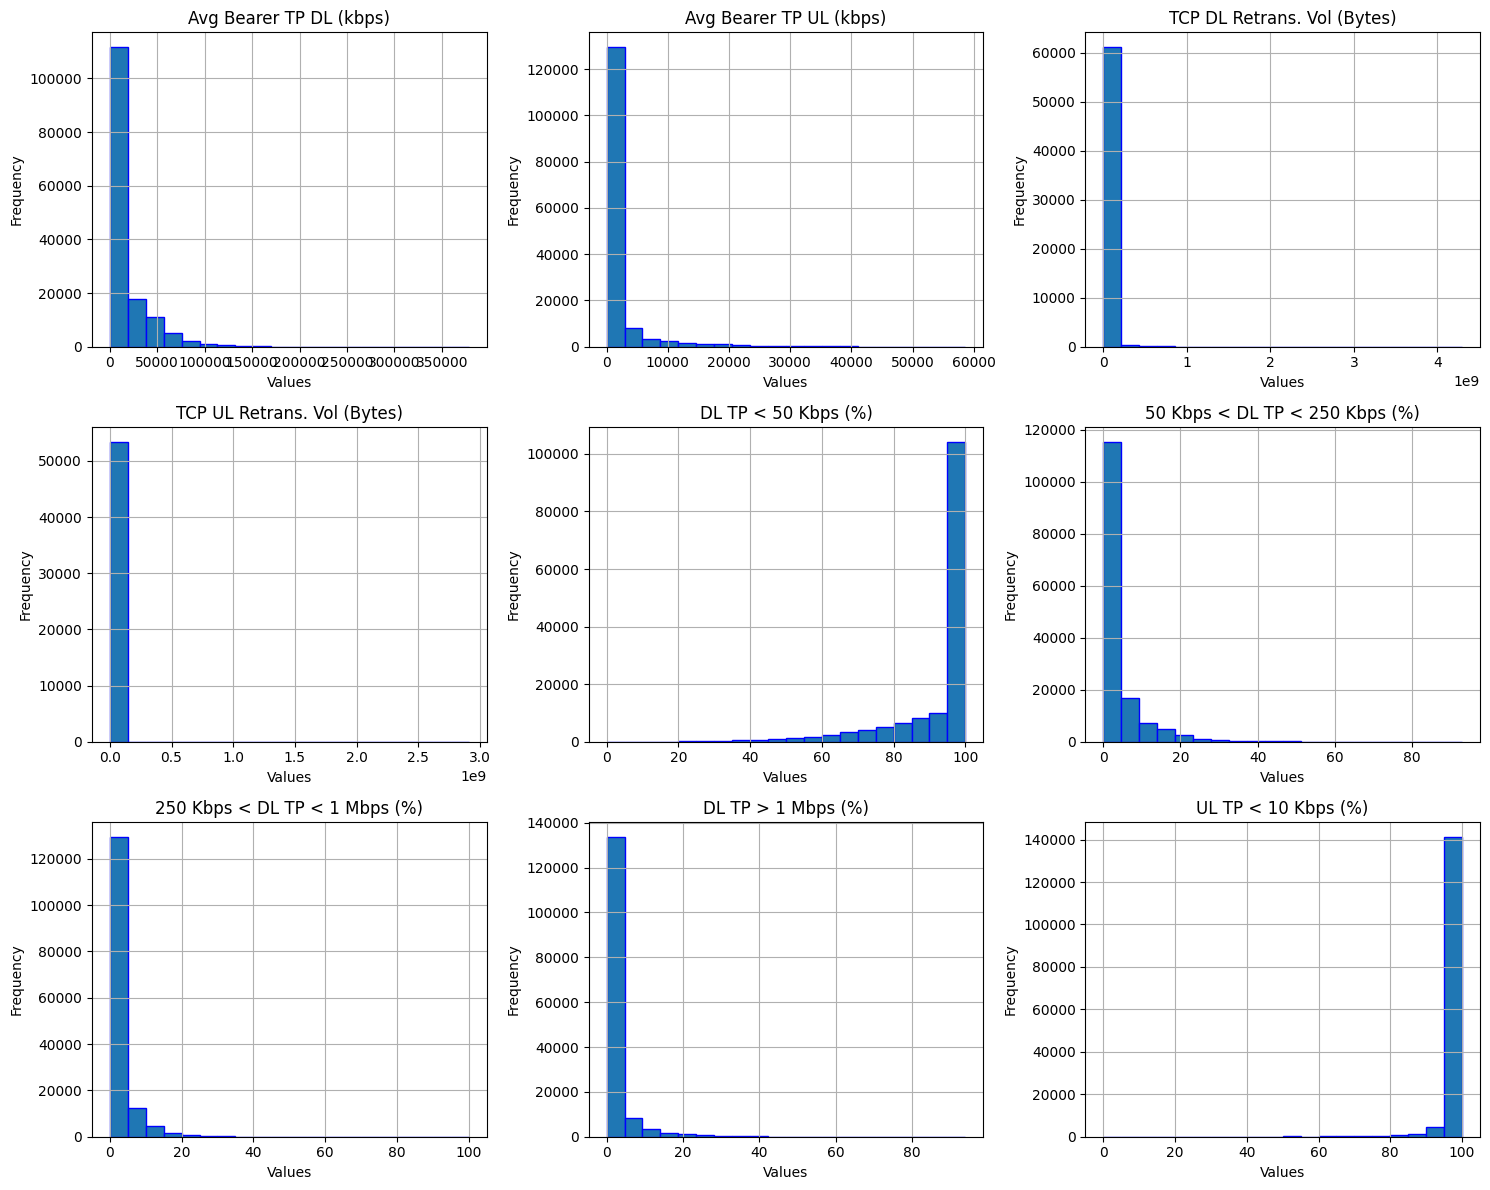

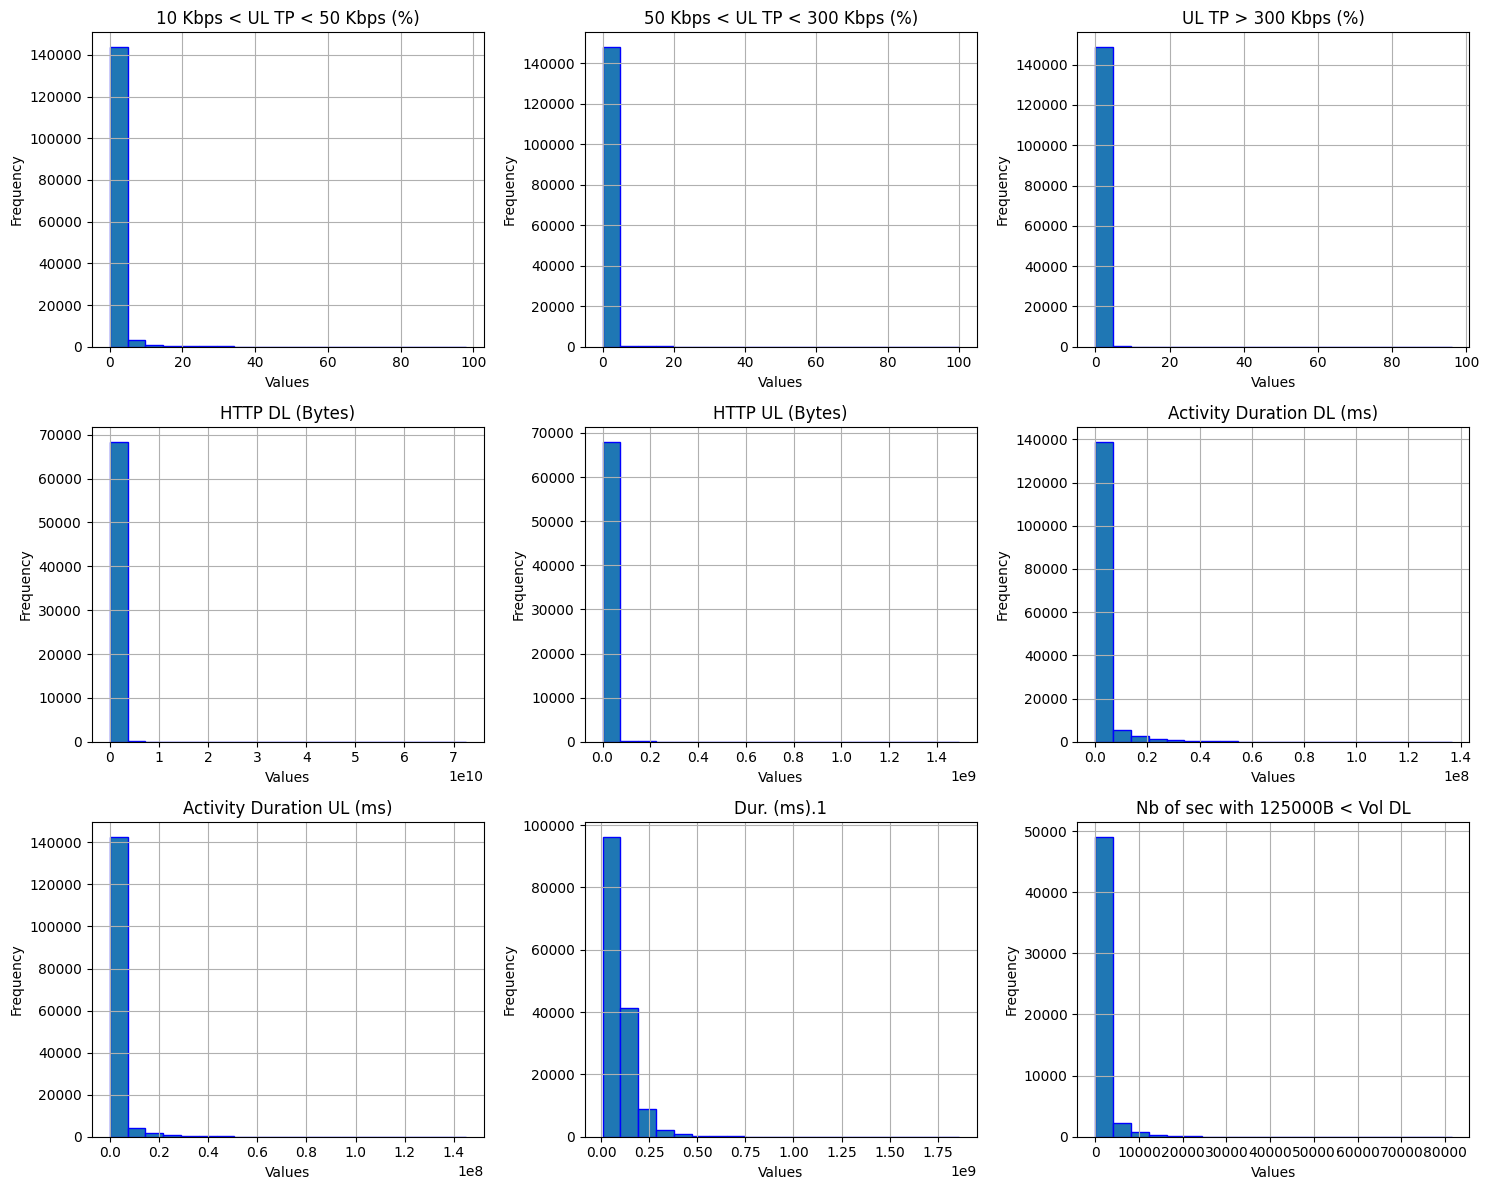

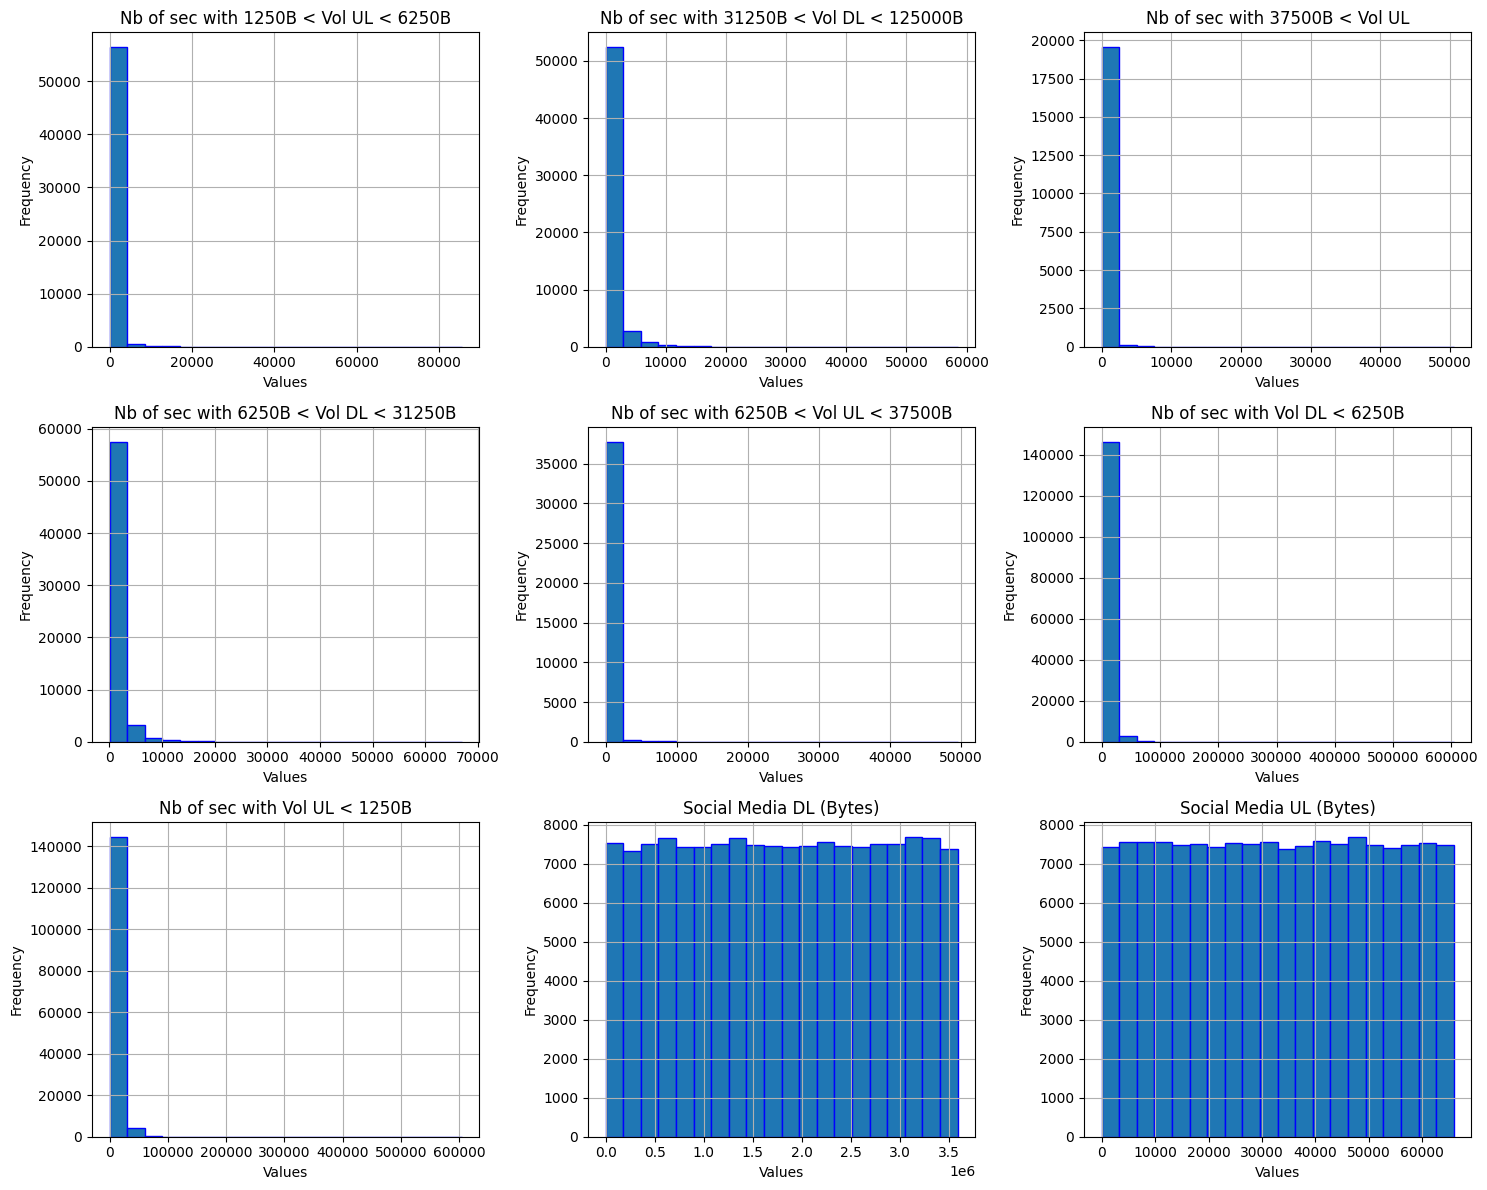

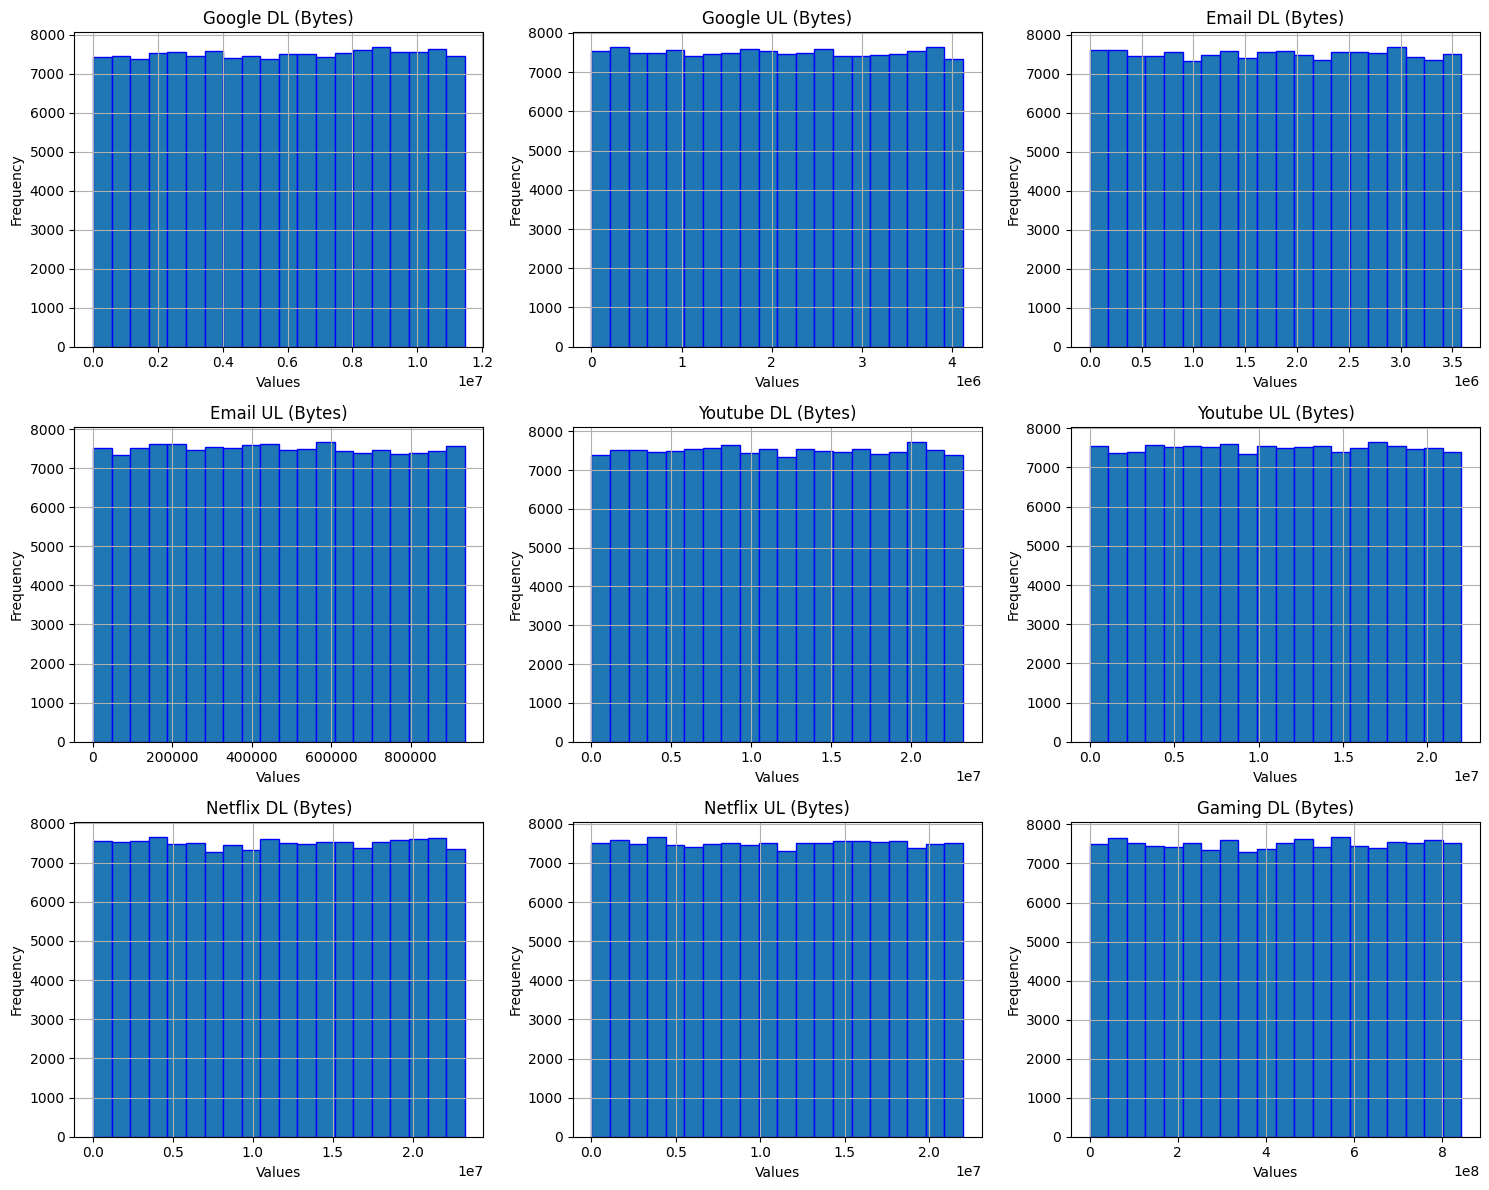

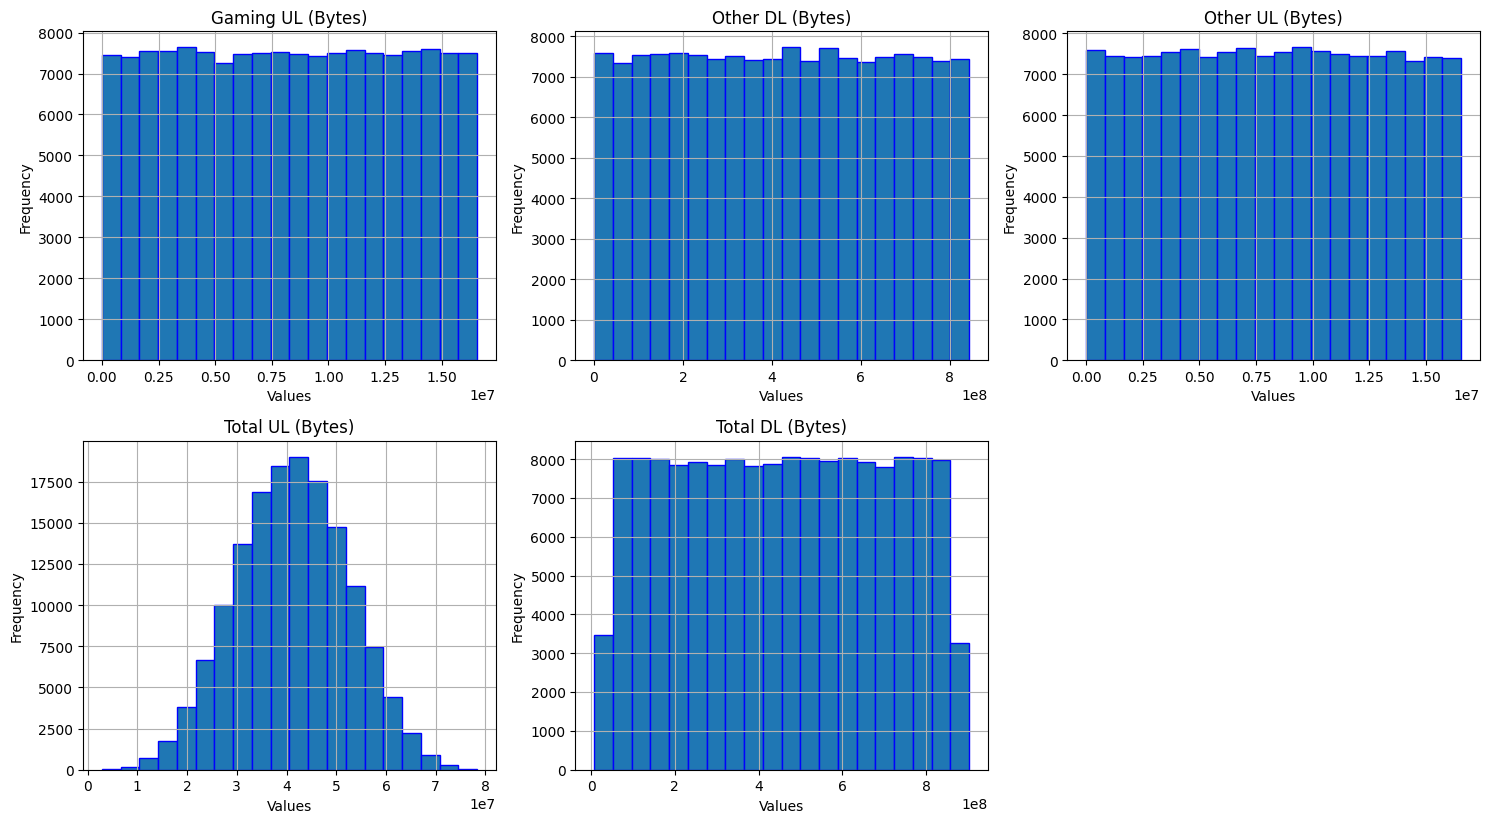

In [8]:
numerical_cols = data_tel.select_dtypes(include=["float64", "int64"]).columns
num_columns = data_tel[numerical_cols]
plot_histograms(data_tel, numerical_cols)


# Telecom User Overview Analysis

Identifying the Top 10 Handsets Used by Customers

Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


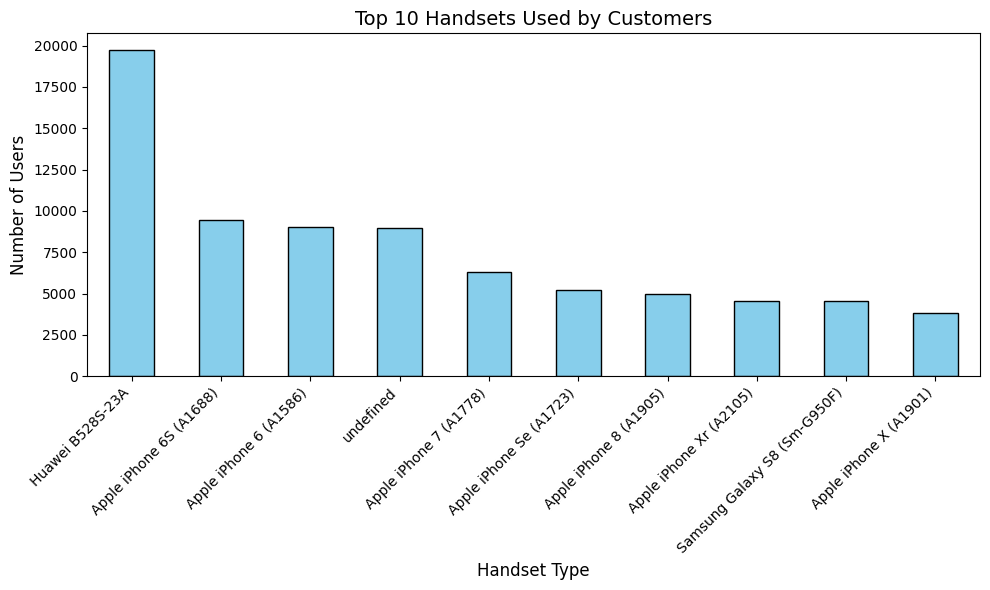

In [5]:
top_handsets_df = top_10_handsets(data_tel, column='Handset Type')


Identifying the Top 3 Handset Manufacturers


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


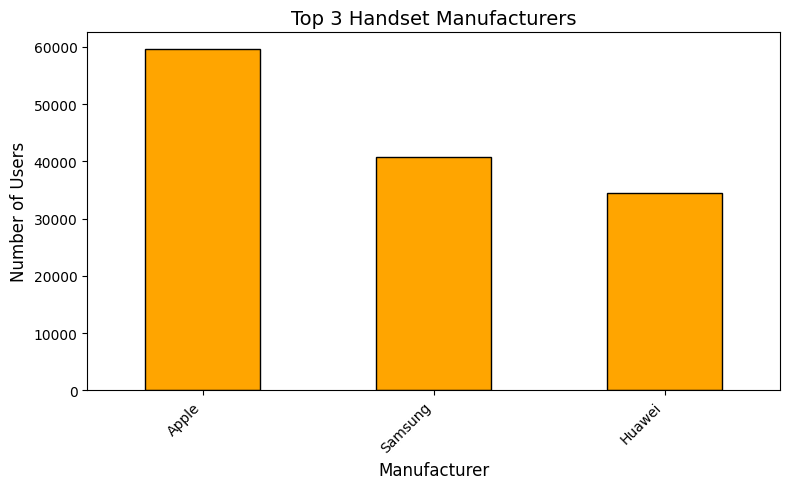

     Count  count
0    Apple  59565
1  Samsung  40839
2   Huawei  34423


In [6]:
# Call the method with your DataFrame
top_manufacturers_df = top_3_handset_manufacturers(data_tel, column='Handset Manufacturer')

# Display the returned DataFrame (if needed)
print(top_manufacturers_df)


 Identifying the Top 5 Handsets Per Top 3 Handset Manufacturers


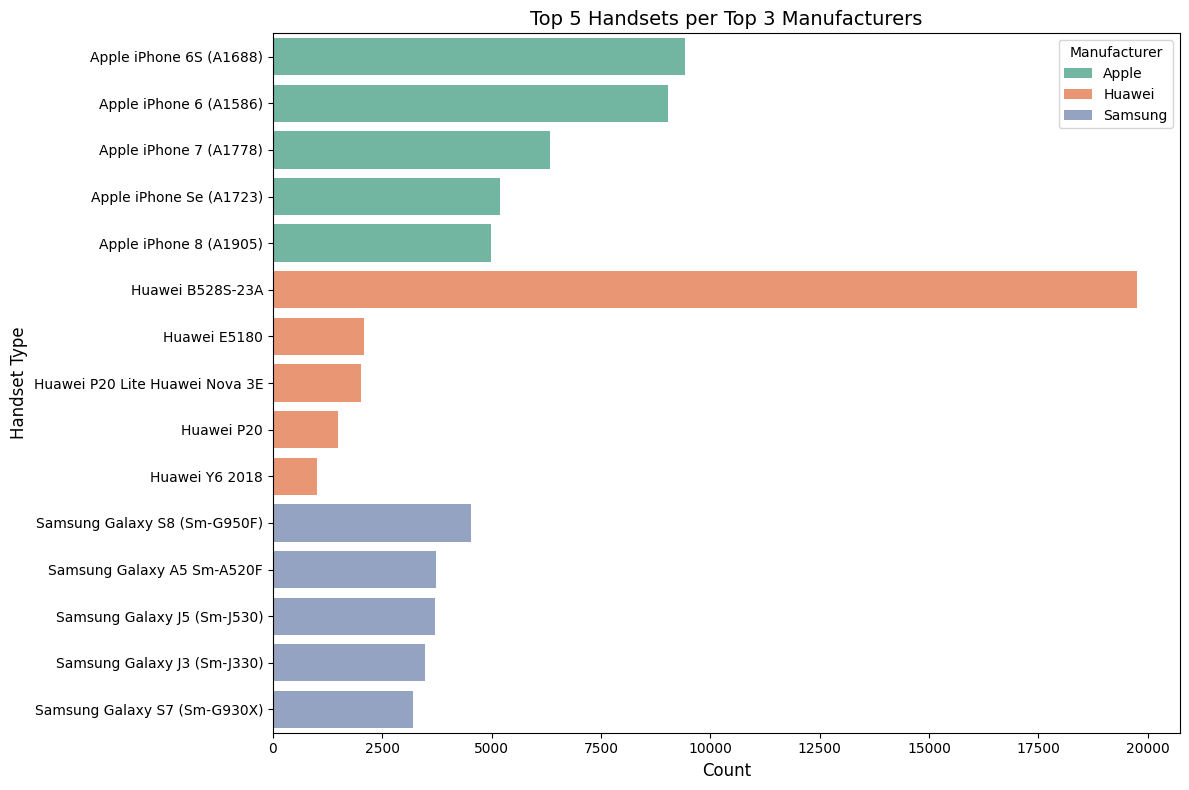

Top 5 Handsets for Each of the Top 3 Manufacturers:
    Handset Manufacturer                    Handset Type  Count
35                 Apple         Apple iPhone 6S (A1688)   9419
31                 Apple          Apple iPhone 6 (A1586)   9023
41                 Apple          Apple iPhone 7 (A1778)   6326
55                 Apple         Apple iPhone Se (A1723)   5187
48                 Apple          Apple iPhone 8 (A1905)   4993
83                Huawei                Huawei B528S-23A  19752
104               Huawei                    Huawei E5180   2079
183               Huawei  Huawei P20 Lite Huawei Nova 3E   2021
182               Huawei                      Huawei P20   1480
224               Huawei                  Huawei Y6 2018    997
359              Samsung    Samsung Galaxy S8 (Sm-G950F)   4520
242              Samsung      Samsung Galaxy A5 Sm-A520F   3724
292              Samsung     Samsung Galaxy J5 (Sm-J530)   3696
284              Samsung     Samsung Galaxy J3 (Sm-J

In [5]:
# Call the function to get the top 5 handsets for the top 3 manufacturers
top_5_handsets = top_5_handsets_per_top_3_manufacturers(data_tel)

# Display the results
print("Top 5 Handsets for Each of the Top 3 Manufacturers:")
print(top_5_handsets)


 aggregate the user behavior

In [5]:
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
# Apply the aggregation function
aggregated_user_behavior = aggregate_user_behavior(data_tel)

# Now, aggregated_user_behavior contains the aggregated data for each user
print(aggregated_user_behavior)

                IMSI  num_sessions  total_duration  total_social_media_dl  \
0       2.040471e+14             1         869.844              1500145.0   
1       2.040808e+14             1         877.385               668596.0   
2       2.082001e+14             1          86.019              3073697.0   
3       2.082001e+14             1          86.254              2542767.0   
4       2.082001e+14             2         573.923              3326811.0   
...              ...           ...             ...                    ...   
107260  2.082099e+14             1         127.367              1209387.0   
107261  2.082099e+14             1         168.543              3462783.0   
107262  2.082099e+14             1          86.399              2601607.0   
107263  2.082522e+14             1          56.613               621586.0   
107264  2.140743e+14             1         226.790              2309742.0   

        total_social_media_ul  total_google_dl  total_google_ul  \
0       

In [7]:
aggregated_user_behavior.columns
aggregated_user_behavior

,IMSI,num_sessions,total_duration,total_social_media_dl,total_social_media_ul,total_google_dl,total_google_ul,total_email_dl,total_email_ul,total_youtube_dl,total_youtube_ul,total_netflix_dl,total_netflix_ul,total_gaming_dl,total_gaming_ul,total_other_dl,total_other_ul,total_dl,total_ul,total_data_volume
0,2.040471e+14,1,869.844,1500145.0,45943.0,5985089.0,3233558.0,2518425.0,812549.0,18980320.0,21960390.0,21621336.0,7224894.0,28092282.0,14977978.0,3.891597e+08,12200737.0,78697597.0,60456049.0,1.391536e+08
1,2.040808e+14,1,877.385,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,164563605.0,13485133.0,4.676781e+08,2848373.0,194828056.0,37295915.0,2.321240e+08
2,2.082001e+14,1,86.019,3073697.0,49084.0,603691.0,1020971.0,3076735.0,580766.0,5556563.0,14325876.0,15305361.0,16525201.0,3760934.0,5363582.0,5.000445e+08,15929178.0,31376981.0,53794658.0,8.517164e+07
3,2.082001e+14,1,86.254,2542767.0,34337.0,10699827.0,3111651.0,3248863.0,606871.0,22414714.0,3242918.0,10065639.0,17720213.0,343946503.0,159394.0,3.009029e+08,8707888.0,392918313.0,33583272.0,4.265016e+08
4,2.082001e+14,2,573.923,3326811.0,99905.0,9118088.0,2547799.0,4225757.0,1338705.0,4046597.0,9793604.0,30748449.0,26594966.0,910301321.0,7383445.0,1.055869e+09,23566580.0,961767023.0,71325004.0,1.033092e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107260,2.082099e+14,1,127.367,1209387.0,47216.0,8114248.0,3933358.0,845456.0,110856.0,8661662.0,2959812.0,5726631.0,5040884.0,664258019.0,14235971.0,5.808342e+08,7560085.0,688815403.0,33888182.0,7.227036e+08
107261,2.082099e+14,1,168.543,3462783.0,2972.0,661679.0,3626134.0,1531947.0,752619.0,23251957.0,11605503.0,14193266.0,16541988.0,408071389.0,3311290.0,7.437719e+08,8852044.0,451173021.0,44692550.0,4.958656e+08
107262,2.082099e+14,1,86.399,2601607.0,8059.0,1612388.0,2815546.0,1405783.0,311862.0,22196893.0,6993803.0,15051715.0,4554026.0,264956718.0,7089918.0,4.481531e+08,8582273.0,307825104.0,30355487.0,3.381806e+08
107263,2.082522e+14,1,56.613,621586.0,45495.0,1208403.0,1019102.0,3023466.0,31158.0,12776130.0,12133368.0,9816072.0,1098136.0,773183701.0,15385758.0,5.791097e+08,15370837.0,800629358.0,45083854.0,8.457132e+08


In [ ]:
query = get_user_data_query()
aggregated_data = pd.read_sql_query(query, connection)

